<a href="https://colab.research.google.com/github/ycyoondev/DL_zero_to_all_TensorFlow/blob/master/210922_Basic_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학습률과 데이터 전처리

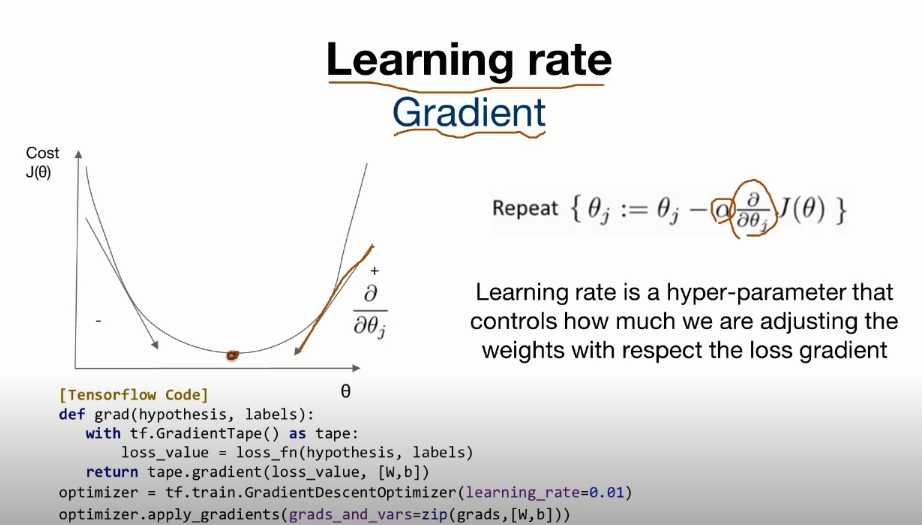

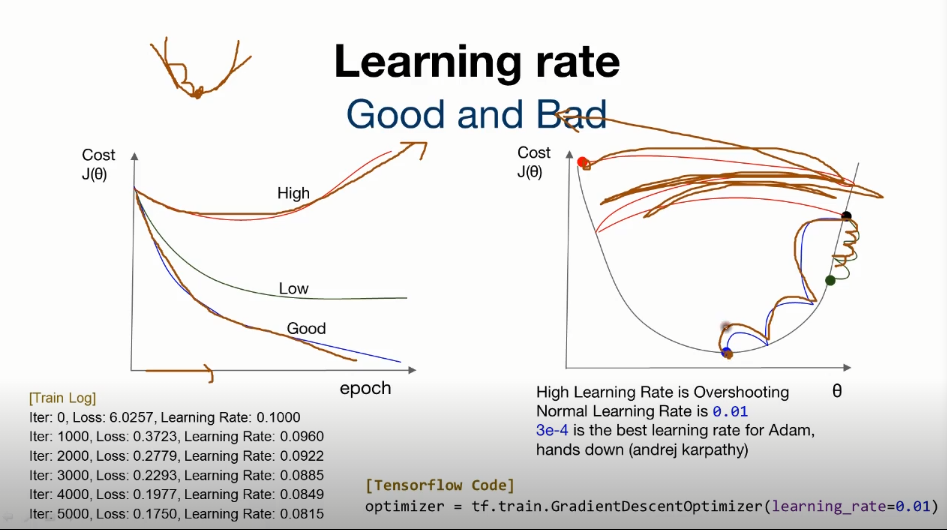

일반적으로 0.01을 learning rate로 많이 사용한다.

Adam optimizer의 경우에는 0.0003이 추천된다.

좋은 learning rate를 구했다 하더라도 학습을 하면서 적절히 조정해야한다. 학습이 더이상 진행되지 않는과정에서 learning late를 줄여서 조절한다. 

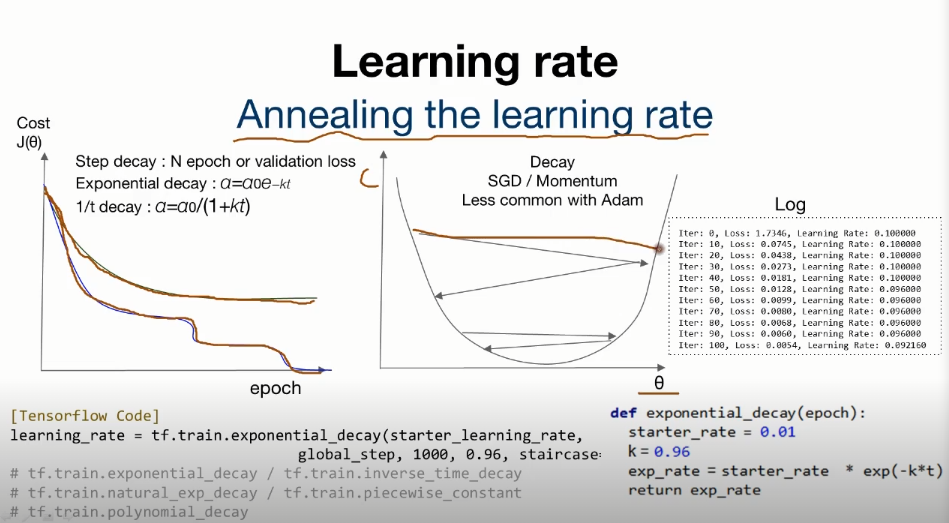

이렇게 상황별로 learning rate를 조절하는 방법이있다. 위 슬라이드의 아래 부분이 조절방법이다.

## Data preprocessing

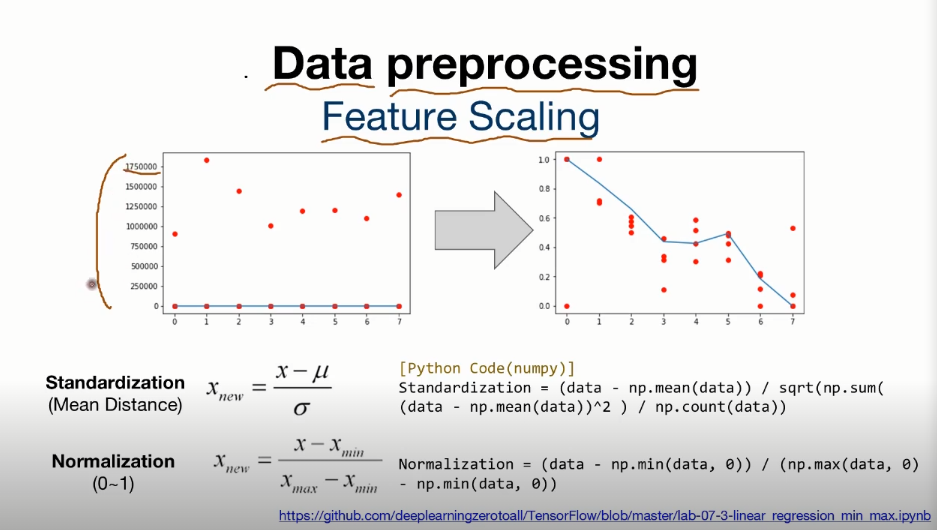

위 그림과같이 이상치를 없에야 할수가있다. 

표준화는 평균부터 떨어진 거리를 변환시킨것이고, 정규화는 0과 1사이로 분포시키는 방법이다. 

이는 numpy를 이용해서 수식화 할 수 있다.

이를 실제 사례를 통해서 생각해보자. 

아래 데이터는 쓸모없는 부분을 제외하고 분석이 필요한 부분에 조명하는것이다

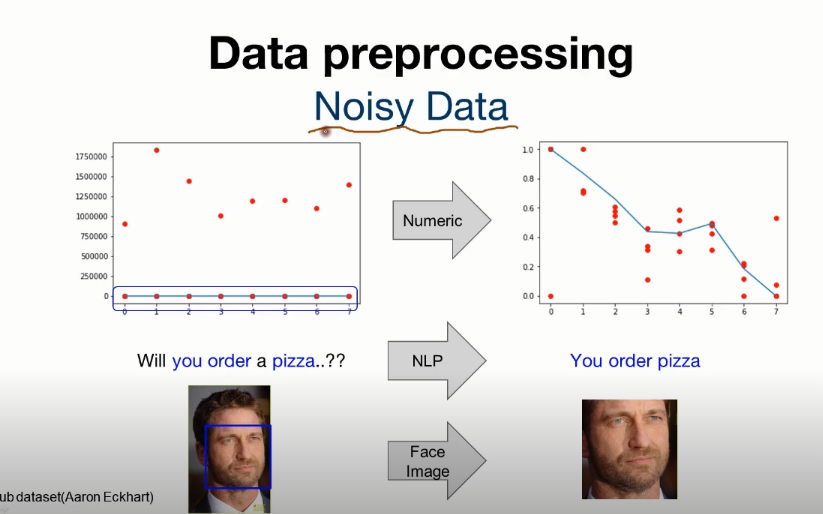

맨 위는 극단치인 이상값을 변환시킨것이다. 다음 NLP는 자연어 처리 방법으로 여기서 실제 의미를 가지는 부분을 추출한것이다. 아래 이미지 분석은 얼굴에서 중요한 부분을 집중한것이다.

# Overfitting

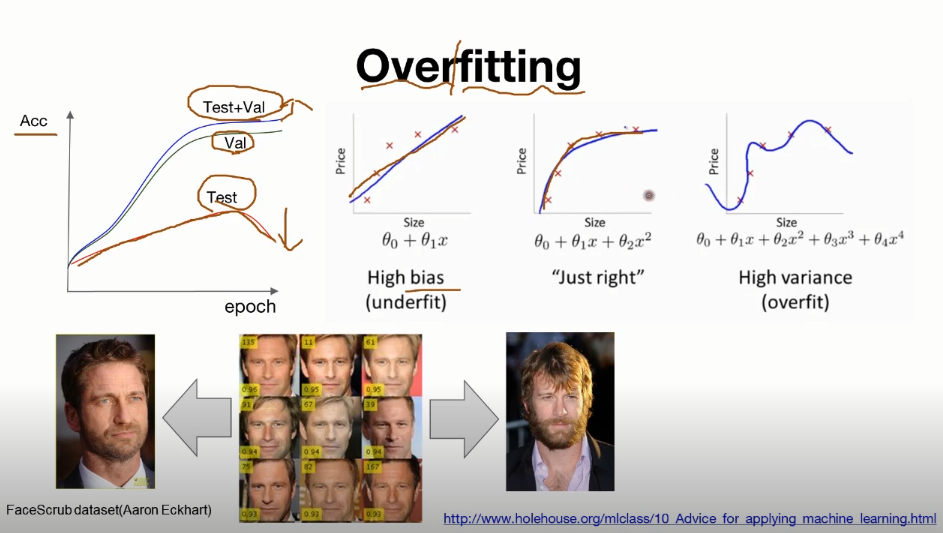

위 3개의 그래프는 각각 학습이 잘 안된경우, 적절히 학습된경우, 학습이 너무 많이되어 overfitting이 된 경우이다.

여기서 overfitting경우를 high variance라고도 한다.

이를 해결하기위해서는 feature를 어떻게 넣느냐에 따라서 확인 할 수 있다.

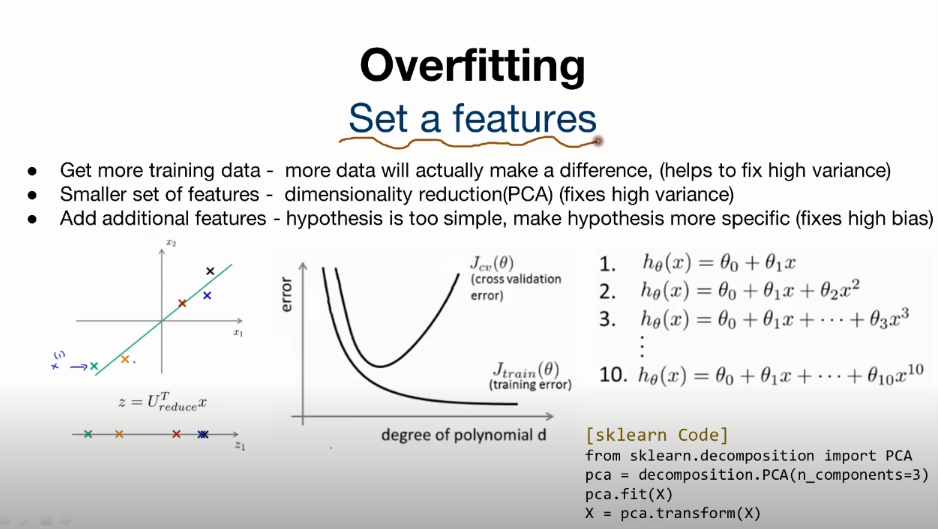

- 가장 일반적인것은 feature를 많이 넣는것이다. 데이터가 다양해질수록 정확도가 높아진다.

- 데이터의 차원을 줄여서 간단화 시켜서 학습한다. 여기 sklearn을 이용해 이를 이용한것이다.

- 모델이 너무 간단화하면 모델 의미가 사라질 수있기때문에 해당의미를 가진 feature를 더 넣어서 복잡도를 높여서 문제를 해결하는 방법이다.

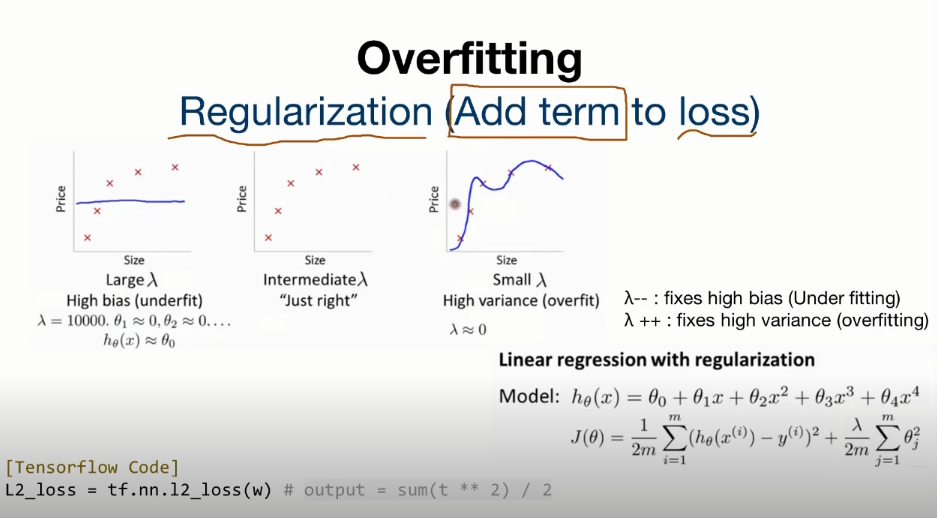

정규화를 통해서 해결할 수 있다. 

모델에서 하나의 인자가 너무 크게 영향을 주게 되면 다른 인자의 영향력이 상쇄될 수 있다. 따라서 정규화를 통해서 각 인자가 비슷한 영향력을 가지고 학습이 진행되도록 가이드를 만들어주는 방법이다. 

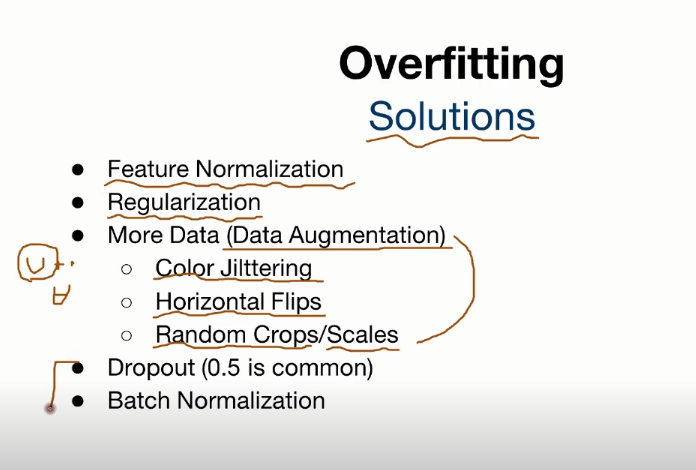

위 방법도 존재한다.

# Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.6.0


In [2]:
def normalization(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator

# 데이터를 0~1 구간에 배치시킨다.

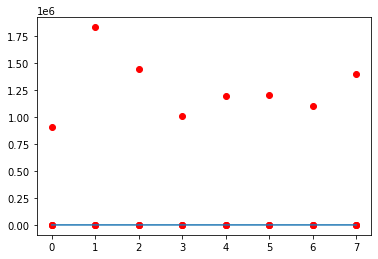

In [3]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# 위 데이터를 보면 대부분 800몇을 가지고있다. 하지만 가끔 900000과 같은 매우 큰값이 섞여있다. 극단값이 영향을 주지않게 해야한다.
# 이러한 극단값을 변환시키는것이 위에 선언한 normalization을 하는것이다. 

x_train = xy[:, 0:-1] # 마지막 이전
y_train = xy[:, [-1]] # 마지막자리

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show() # nomarization 이전에 함수 분표를 보여준다.

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


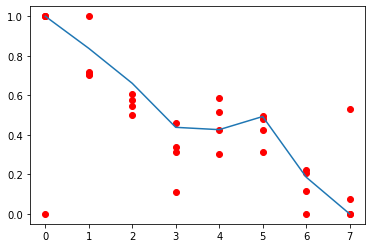

In [4]:
xy = normalization(xy)
print(xy)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show() # nomarization 이후 함수 분포를 보여준다.

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
# tenserflow의 data처리 API
# 데이터의 셔플 등 처리가 용의해진다.

In [6]:
# 학습에 사용할 W, b의 크기를 알맞게 선언한다.
W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32) 
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

In [7]:
# 가설을 만든다.
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

In [8]:
# l2로스는 W인자의 크기를 nomarization한다.
def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

In [9]:
def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels)) # 가설과 실제 값의 차이 
    if(flag): # l2로스를 적용할지 말지 flag로 판단
        cost = l2_loss(cost)
    return cost

### 어쩔때 L1 loss, L2 loss를 써야할까?

outlier의 정도가 심하면 l2 loss를 쓰는것이 좋다.

In [10]:
# 학습을 위한 parameter 정의
is_decay = True
starter_learning_rate = 0.1 # learning rate

if(is_decay):    # learning rate를 decay하는 기법. 여기서는 50회마다 4%씩 감소시킴
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                  decay_steps=50,
                                                                  decay_rate=0.96,
                                                                  staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag) # 비교해가면서 l2_loss를 적용할지 말지 판단
    return tape.gradient(loss_value, [W,b]), loss_value # 나온 loss를 실제 모델에 적용

In [17]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 0.0039
Iter: 10, Loss: 0.0039
Iter: 20, Loss: 0.0039
Iter: 30, Loss: 0.0039
Iter: 40, Loss: 0.0039
Iter: 50, Loss: 0.0039
Iter: 60, Loss: 0.0038
Iter: 70, Loss: 0.0038
Iter: 80, Loss: 0.0038
Iter: 90, Loss: 0.0038
Iter: 100, Loss: 0.0038
